# Toxic Comment Classification Project.

*The dataset used in this project is taken from [This](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge) competition on Kaggel.*

### Importing the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.cm as cm
import itertools
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/k_y/Downloads/Dataset/train.csv')

In [9]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [10]:
df.shape

(159571, 8)

In [11]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [12]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [13]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [15]:
# finding all the rows where the sum of labels is zero i.e the comment is a Clean comment
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
df['clean'].sum()

143346

In [16]:
# Total no.of toxic comments
len(df[df['toxic']==1])

15294

In [17]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,True
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,True
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,True
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,True


### Using seaborn and matplotlib to visualize the count of different categories of toxicity of comments.


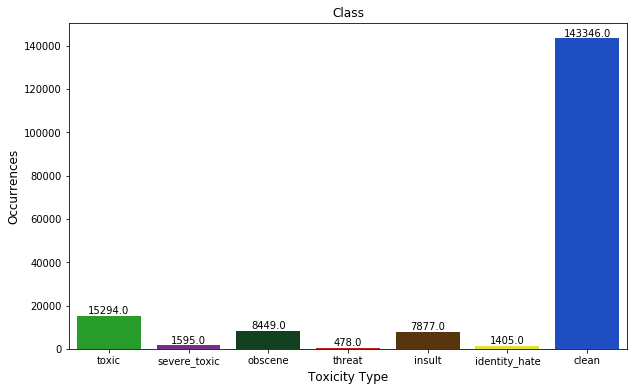

In [18]:
# Using seaborn and matplotlib to visualize the count of different categories of toxicity of comments

colors_list = ["green", "purple","pine green","red", "brown","yellow", "blue"]

palette= sns.xkcd_palette(colors_list)

x=df.iloc[:,2:].sum()

plt.figure(figsize=(10,6))
# x.index has all the toxicity labels and x.values has their respective count
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.xlabel('Toxicity Type', fontsize = 12)
plt.ylabel('Occurrences', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

**The graph shows us that the dataset is highly imbalanced as more than 1.4lac comments are categorized as clean**

### Taking an insight of the length of the comments in the dataset.

In [19]:
comment = df['comment_text']
for i in range(5):
    print(i,"- " + comment[i] + "\n Length -" ,len(comment[i]))

0 - Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
 Length - 264
1 - D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
 Length - 112
2 - Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
 Length - 233
3 - "
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have a

***The length of the comments looks to be quite large, so we'll visualize some more info about the comments.***

In [20]:
# creating a numpy array of the length of each comment in the dataset.
x = np.array([len(comment[i]) for i in range(comment.shape[0])])

In [21]:
print("""The maximum length of comment is:{} 
        \nThe minimum length of the comment is:{} 
        \nAnd the average length of a comment is: {}""".format(x.max(),x.min(),x.mean()))

The maximum length of comment is:5000 
        
The minimum length of the comment is:6 
        
And the average length of a comment is: 394.0732213246768


The average length of comment is : 394.073


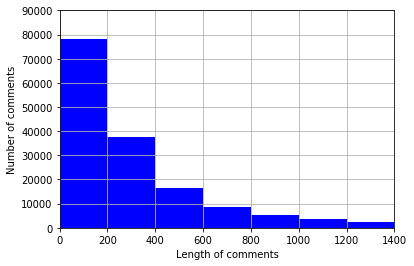

In [22]:
print('The average length of comment is : 394.073' )
bins = [1,200,400,600,800,1000,1200,1400]
plt.hist(x, bins=bins, color = 'Blue')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1400, 0, 90000])
plt.grid(True)
plt.show()

***It is visible that length of most of the comments(Approx 80,000) lies in the range of 0-200 and around 40,000 lie in between 200-400***

## Now we will try to find the count of different toxicity of comments in each bin!

In [23]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head(10))
label = label.as_matrix()

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0


/Users/k_y/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
label.shape

(159571, 6)

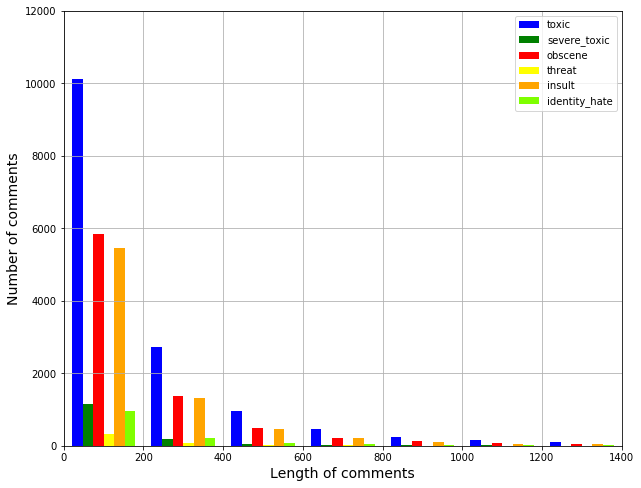

In [25]:
# Creating a zero matrix of shape (159571,6)
y = np.zeros(label.shape)
for i in range(label.shape[0]):
    l = len(comment[i])
    if label[i][0] :
        y[i][0] = l
    if label[i][1] :
        y[i][1] = l
    if label[i][2] :
        y[i][2] = l
    if label[i][3] :
        y[i][3] = l
    if label[i][4] :
        y[i][4] = l
    if label[i][5] :
        y[i][5] = l

label_plot = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['blue','green','red','yellow','orange','chartreuse']    
plt.figure(figsize = (10,8))
plt.hist(y,bins = bins,label = label_plot,color = color)
plt.axis([0, 1400, 0, 12000])
plt.xlabel('Length of comments', fontsize = 14)
plt.ylabel('Number of comments', fontsize = 14) 
plt.legend()
plt.grid(True)
plt.show()

## Remove excessive length comments

In [26]:
# creating a list of comments with less than 400 length of words.
trim_comments = [comment[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ]

# creating corresponding labels for those comments
my_labels = np.array([label[i] for i in range(comment.shape[0]) if len(comment[i])<=400 ])


In [27]:
my_labels[:10, :]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [38]:
print(len(trim_comments))
print(len(my_labels))
print("Thus number of removed comments = {}".format(159571-115910))

115910
115910
Thus number of removed comments = 43661


*So now we are left with only 115910 comments whose length is less than 400*

In [39]:
print(len(trim_comments))
print(my_labels.shape)

115910
(115910, 6)


## Preprocessing of the comments.

 *This involves :*

* Removing punctuation and special characters from the comments
* Removing **Stop words** i.e removing such words that don't add to the meaning of the sentence.
* Stemming and Lemmatizing the words.
* Applying count Vectoriser
* Splitting dataset into training and testing.


In [30]:
# Punctuation removal

import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [37]:
# Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Adding alphabets to the set
for i in range(ord('a'),ord('z')+1):
    stop_words.add(chr(i))
print(stop_words)

{'has', 'myself', 'e', 'off', 'through', "haven't", "it's", 'f', 'her', 'she', 'such', 'if', 'been', 'or', 'me', 'for', 'here', "wouldn't", 'did', "doesn't", "aren't", "you'll", 'we', 't', "shouldn't", 'what', 'p', 'himself', "mustn't", 'he', 'n', 'these', 'c', 'weren', 'which', 'doing', 'is', "mightn't", 'r', 'i', 'w', 'of', 'o', 's', 'during', 'wasn', 'whom', 'where', 'won', "should've", 'will', 'being', 'g', 'against', 'than', "you're", 'each', "that'll", 'a', "needn't", 're', 'q', "don't", 'was', 'their', 'why', 'them', 'it', 'have', 'to', 'theirs', "wasn't", 'both', 'wouldn', 'ours', 'an', 'your', "you'd", 'above', 'does', 'few', 'some', 'j', 'the', 'that', 'from', 'll', 'most', 'z', 'yours', 'my', 'about', "isn't", 'ourselves', 'no', 'only', 'until', 'now', 'on', 'over', 'can', 'again', 'this', 'as', 'our', 'be', 'below', 've', 'ain', "she's", 'with', "you've", 'doesn', 'l', 'up', 'hasn', 'don', 'those', "hadn't", 'but', 'itself', 'y', 'then', "didn't", 'more', 'd', 'its', 'didn'

In [40]:
# Stemming and Lemmatizing
from nltk.stem import WordNetLemmatizer, PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [41]:
# Looping through all the comments and processing them through the functions defined above.

for i in range(len(trim_comments)):
    trim_comments[i] = trim_comments[i].lower().translate(trantab)
    word_list = []
    for word in trim_comments[i].split():
        if not word in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    trim_comments[i]  = " ".join(word_list)

In [42]:
# Comments after stop words removal, stemming and lemmatizing.
for i in range(5):
    print(trim_comments[i],"\n")

explan edit make usernam hardcor metallica fan revert vandal closur ga vote new york doll fac plea remov templat talk page sinc i'm retir 

d'aww match background colour i'm seemingli stick thank talk januari utc 

hey man i'm realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info 

sir hero chanc rememb page that' 

congratul well use tool well · talk 



In [43]:
# Applying count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
 
#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(trim_comments[:20000]).toarray()

In [44]:
tf.shape

(20000, 24497)

> **Note** *: Due to hardware limitation, we were only able to process 20,000 comments out of 115910, so the results and accuracy are obtained accordingly.*

### Splitting into training and testing

In [45]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = shuffle(tf, my_labels[:20000],3)

print(X_test.shape)
print(X_train.shape)

(6666, 24497)
(13334, 24497)


In [74]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))
    recall = recall_score(Y_test,predict,average="weighted")
    print("Recall_score : {}".format(recall*100))
    f1 = f1_score(Y_test,predict,average="weighted")
    print("F1_score : {}".format(f1*100))

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for i in range(6):
    clf.append(AdaBoostClassifier())
    clf[i].fit(X_train,Y_train[:,i])

In [77]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(6666, 6)


In [78]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.6352635263526354
Accuracy : 88.85388538853886
Log_loss : 2.021152461458922
Recall_score : 59.4733829421866
F1_score : 65.48730737803703


In [79]:
from sklearn.naive_bayes import BernoulliNB

In [80]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for i in range(6):
    clf.append(BernoulliNB())
    clf[i].fit(X_train,Y_train[:,i])

In [81]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(6666, 6)


In [82]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.6352635263526354
Accuracy : 88.85388538853886
Log_loss : 2.021152461458922
Recall_score : 59.4733829421866
F1_score : 65.48730737803703


In [83]:
from sklearn.neural_network import MLPClassifier

In [84]:
from sklearn.svm import SVC
classifier = MLPClassifier()
classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
#predictions
predictions = classifier.predict(X_test)

In [86]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 2.652765276527653
Accuracy : 88.7038703870387
Log_loss : 2.087780339581937
Recall_score : 59.129937034917
F1_score : 65.3229021736219


## 1. Binary Relevance (BR) Method with MultinomialNB classifiers

In [87]:
from sklearn.naive_bayes import MultinomialNB

In [88]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for i in range(6):
    clf.append(MultinomialNB())
    clf[i].fit(X_train,Y_train[:,i])

In [89]:
# predict list contains the predictions, it is transposed later to get the proper shape
predict = []
for i in range(6):
    predict.append(clf[i].predict(X_test))

predict = np.asarray(np.transpose(predict))
print(predict.shape)

(6666, 6)


In [90]:
evaluate_score(Y_test,predict)

Hamming_loss : 3.6553655365536555
Accuracy : 87.56375637563757
Log_loss : 1.9723353557125929
Recall_score : 51.80309101316543
F1_score : 55.33283956084789


## 2. BR Method with SVM classifier (from scikit-multilearn)

In [91]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(X_train, Y_train)

/Users/k_y/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/k_y/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/k_y/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/k_y/opt/anaconda3/lib/python3.7/site-packa

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None,
                               coef0=0.0, decision_function_shape='ovr',
                               degree=3, gamma='auto_deprecated', kernel='rbf',
                               max_iter=-1, probability=False,
                               random_state=None, shrinking=True, tol=0.001,
                               verbose=False),
                require_dense=[False, True])

In [92]:
#predictions
predictions = classifier.predict(X_test)

In [93]:
#calculate scores
evaluate_score(Y_test,predictions)

Hamming_loss : 4.367936793679368
Accuracy : 88.16381638163816
Log_loss : 0.4695775266638782
Recall_score : 0.0
F1_score : 0.0


/Users/k_y/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 3. BR Method with GaussianNB classifier.

In [94]:
from sklearn.naive_bayes import GaussianNB
#create and fit classifiers
clf = []
for i in range(6):
    clf.append(GaussianNB())
    clf[i].fit(X_train,Y_train[:,i])

In [95]:
#predictions
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

In [96]:
#calculate scores
predict = np.asarray(np.transpose(predict))
evaluate_score(Y_test,predict)

Hamming_loss : 12.846284628462845
Accuracy : 65.24152415241524
Log_loss : 1.624168423939923
Recall_score : 46.99484831139096
F1_score : 24.794453557003852


In [100]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


items = ['Accuracy', 'Hamming_loss', 'Log_loss', 'Recall_score', 'F1']
labels= ['AdaBoostClassifier','BernoulliNB','MLPClassifier','MultinomialNB','BinaryRelevance','GaussianNB']
x = np.array()
for item in items:
    figure(num=None, figsize=(14, 6), dpi=250)
    ax = plt.subplot(111)
    for n in range(len(labels)):
        if(item=='Accuracy'):
            y = ['88.85388538853886','88.85388538853886','88.7038703870387','87.56375637563757','88.16381638163816','65.24152415241524']
        if(item=='Hamming_loss'):
            y = ['2.6352635263526354','2.6352635263526354','2.652765276527653','3.6553655365536555','4.367936793679368','12.846284628462845']
        if(item=='Log_loss'):
            y = ['2.021152461458922','2.021152461458922','2.087780339581937','1.9723353557125929','0.4695775266638782','1.624168423939923']
        if(item=='Recall_score'):
            y = ['59.4733829421866','59.4733829421866','59.129937034917','51.80309101316543','0.0','46.99484831139096']
        if(item=='F1'):
            y = ['65.48730737803703','65.48730737803703','65.3229021736219','55.33283956084789','0.0','24.794453557003852']
        plt.plot(x, y[n], label = labels[n])
        
    plt.title(item)
    leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.legend()
    plt.xlabel('Model')
    plt.ylabel('Score')   
    plt.xticks(rotation=90)
    ax.tick_params(labelsize='large', width=5)
    ax.grid(True, linestyle='-.')
    plt.tight_layout()
    plt.show()

ValueError: RGBA values should be within 0-1 range

<Figure size 3500x1500 with 1 Axes>

ValueError: RGBA values should be within 0-1 range

<Figure size 3500x1500 with 1 Axes>

ValueError: RGBA values should be within 0-1 range

<Figure size 3500x1500 with 1 Axes>

ValueError: RGBA values should be within 0-1 range

<Figure size 3500x1500 with 1 Axes>

ValueError: RGBA values should be within 0-1 range

<Figure size 3500x1500 with 1 Axes>

## Result Visualisation.

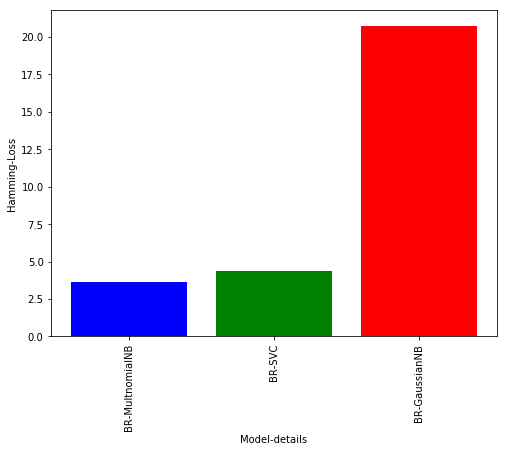

In [48]:
x = ['BR-MultnomialNB','BR-SVC','BR-GaussianNB']
y = [3.65,4.36,20.74]
colors = itertools.cycle(['b', 'g', 'r'])
plt.figure(figsize= (8,6))
plt.ylabel('Hamming-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

* ***The above figure shows that the hamming loss is maximum for BR-GaussianNB and minimum for BR-MultinomialNB***

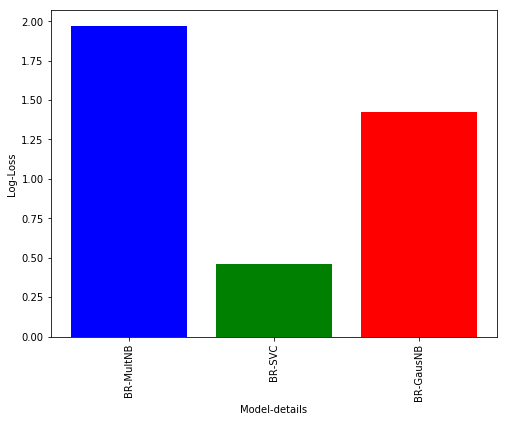

In [49]:
x = ['BR-MultNB','BR-SVC','BR-GausNB']
y = [1.97,0.46,1.422]
colors = itertools.cycle(['b', 'g', 'r'])
plt.figure(figsize=(8,6))
plt.ylabel('Log-Loss')
plt.xlabel('Model-details')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i], color=next(colors))
plt.show()

* ***Similarly, the Log loss is maximum for BR-Multinomial and minimum for BR-SVC***